For detailed information about the dataset and its respective preparation and/or Principal Component Analysis please look at 'Titanic(age_by_mean)_PCA_LogisticRegression'. In this file I will skip each step explained in that file and will talk about only the things not covered in it.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix
df = pd.read_csv('Data/titanic_train.csv')

In [2]:
df = df.drop(['Name','Ticket','Cabin'], axis=1)

In [3]:
df.loc[:,"Age"].median()


28.0

In [4]:
df["Age"].fillna(28, inplace = True)

In [5]:
df.dropna(inplace=True)

In [6]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [7]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [8]:
X=df.drop('Survived',axis=1)
X_renamed = X.rename(columns={'SibSp': 'Num Siblings/Spoused','Parch':'Num Parents/Children'})
y=df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X_renamed, y, test_size=0.3,random_state=2)

I will import the random forest classifier library and try to find out which hyperparameters suit our dataset best.


In [9]:
from sklearn import ensemble

Score = []
for i in range(5,200,5):
    RFC = ensemble.RandomForestClassifier ( n_estimators=i, random_state=2 )
    RFC.fit(X_train, y_train)
    prediction_RFC = RFC.predict(X_test)
    Score.append(round(RFC.score(X_train, y_train) * 100, 2))
    
Score

[97.27,
 98.07,
 99.2,
 99.52,
 99.68,
 99.68,
 99.84,
 99.84,
 99.84,
 99.84,
 99.84,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0]

In [10]:
print('The maximum score is:',max(Score),'.')
index = Score.index(max(Score))
estimators = index*5
print('The number of estimators to be used is: ',estimators,'.')

The maximum score is: 100.0 .
The number of estimators to be used is:  55 .


In [11]:
RFC = ensemble.RandomForestClassifier ( n_estimators=estimators, random_state=2 )
RFC.fit(X_train, y_train)
prediction_RFC = RFC.predict(X_test)


print('Variance score: %.4f' % r2_score(y_test, prediction_RFC))

Variance score: 0.2228


              precision    recall  f1-score   support

           0       0.84      0.89      0.86       170
           1       0.79      0.69      0.74        97

    accuracy                           0.82       267
   macro avg       0.81      0.79      0.80       267
weighted avg       0.82      0.82      0.82       267



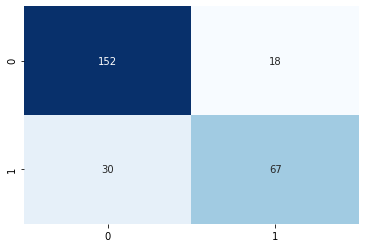

In [12]:
cfm = confusion_matrix(y_test,prediction_RFC)
sns.heatmap(cfm, cbar=False, annot=True, cmap='Blues', fmt='d')
print(classification_report(y_test, prediction_RFC))

In [13]:
Score = round(RFC.score(X_train, y_train) * 100, 2)
Score

99.84